**A predictive analysis amd Data Collection project based on HNG Internship Check-in product scores**

In [ ]:
#importing my needed libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\Users\Chika\AppData\Local\Temp\ipykernel_17796\2000247249.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
#Loading my dataset
checkin = pd.read_csv("C:/Users/Chika/Downloads/Stage 8/Task C/Check in data.csv")

In [23]:
checkin.head(5)

,Products,Week 1 (4th -7th March),Week 2 (10th - 14th March),Week 3 (17th -21st March),Week 4 (23rd - 25th March),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,ReconXi,107.74,196.603,273.603,398.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Delve,77.42,143.907,209.207,272.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Telex,36.46,105.128,168.628,277.628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Outbound AI,49.63,125.152,184.652,252.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Backend.IM,89.04,157.231,205.831,328.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Dropping unnamed columns 
checkin_cleaned = checkin.loc[:, ~checkin.columns.str.contains('^Unnamed')]

In [26]:
#confirming they have been dropped
checkin_cleaned.head()

,Products,Week 1 (4th -7th March),Week 2 (10th - 14th March),Week 3 (17th -21st March),Week 4 (23rd - 25th March)
0,ReconXi,107.74,196.603,273.603,398.603
1,Delve,77.42,143.907,209.207,272.207
2,Telex,36.46,105.128,168.628,277.628
3,Outbound AI,49.63,125.152,184.652,252.152
4,Backend.IM,89.04,157.231,205.831,328.331


In [27]:
# Check the length of the cleaned data
data_length = len(checkin_cleaned)


In [28]:
print(data_length)

20


In [30]:
#Moving on to linear regression
week_cols = ['Week 1 (4th -7th March)', 'Week 2 (10th - 14th March)', 
             'Week 3 (17th -21st March)', 'Week 4 (23rd - 25th March)']

In [31]:
# X values for regression (week numbers)
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
X_future = np.array([[4.6]])  # Projecting Friday of Week 4

In [32]:
# Creating a DataFrame to store predictions
linear_predictions = []

In [33]:
# Apply linear regression per product, skipping rows with missing data
for i, row in checkin_cleaned.iterrows():
    y = row[week_cols].values.astype(float)
    
    if np.isnan(y).any():  # Skip if any NaN exists
        linear_predictions.append(np.nan)
        continue

    model = LinearRegression()
    model.fit(X, y)
    predicted_score = model.predict(X_future)[0]
    linear_predictions.append(predicted_score)


In [34]:
# Step 4: Add prediction column to cleaned DataFrame
checkin_cleaned['Friday Projected Scores'] = linear_predictions

C:\Users\Chika\AppData\Local\Temp\ipykernel_17796\2119291757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkin_cleaned['Friday Projected Scores'] = linear_predictions


In [35]:
print(checkin_cleaned.head())

     Products   Week 1 (4th -7th March)  Week 2 (10th - 14th March)  \
0      ReconXi                   107.74                     196.603   
1        Delve                    77.42                     143.907   
2        Telex                    36.46                     105.128   
3  Outbound AI                    49.63                     125.152   
4   Backend.IM                    89.04                     157.231   

   Week 3 (17th -21st March)  Week 4 (23rd - 25th March)  \
0                    273.603                     398.603   
1                    209.207                     272.207   
2                    168.628                     277.628   
3                    184.652                     252.152   
4                    205.831                     328.331   

   Friday Projected Scores  
0                443.55094  
1                312.11406  
2                312.23184  
3                292.98036  
4                356.06758  


**Visualising the Forecasts(Bar Chart for top 5 Predictions)**

C:\Users\Chika\AppData\Local\Temp\ipykernel_17796\2360207186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, y='Products ', x='Friday Projected Scores', palette='viridis')


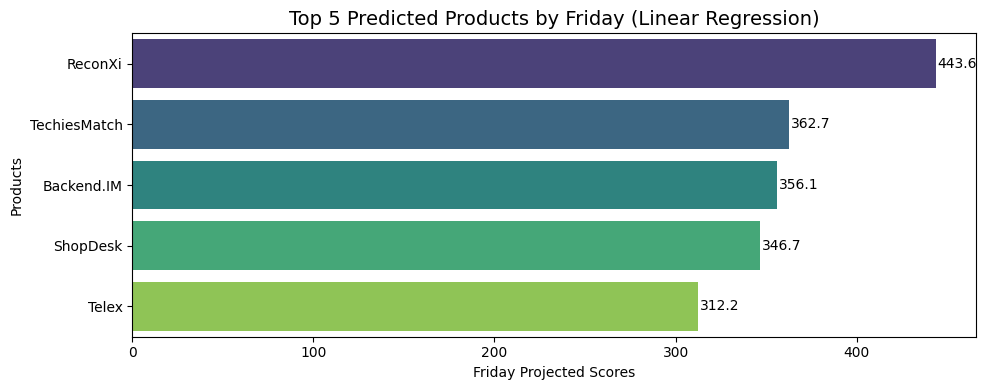

In [38]:
# Sort and get top 5 predicted products
top5 = checkin_cleaned.sort_values(by='Friday Projected Scores', ascending=False).head(5)

plt.figure(figsize=(10, 4))
sns.barplot(data=top5, y='Products ', x='Friday Projected Scores', palette='viridis')

# Annotate each bar
for index, value in enumerate(top5['Friday Projected Scores']):
    plt.text(value + 1, index, f"{value:.1f}", va='center')

plt.title("Top 5 Predicted Products by Friday (Linear Regression)", fontsize=14)
plt.xlabel("Friday Projected Scores")
plt.ylabel("Products")
plt.tight_layout()
plt.show()


**Visualising the trends using line chart for each product across weeks**

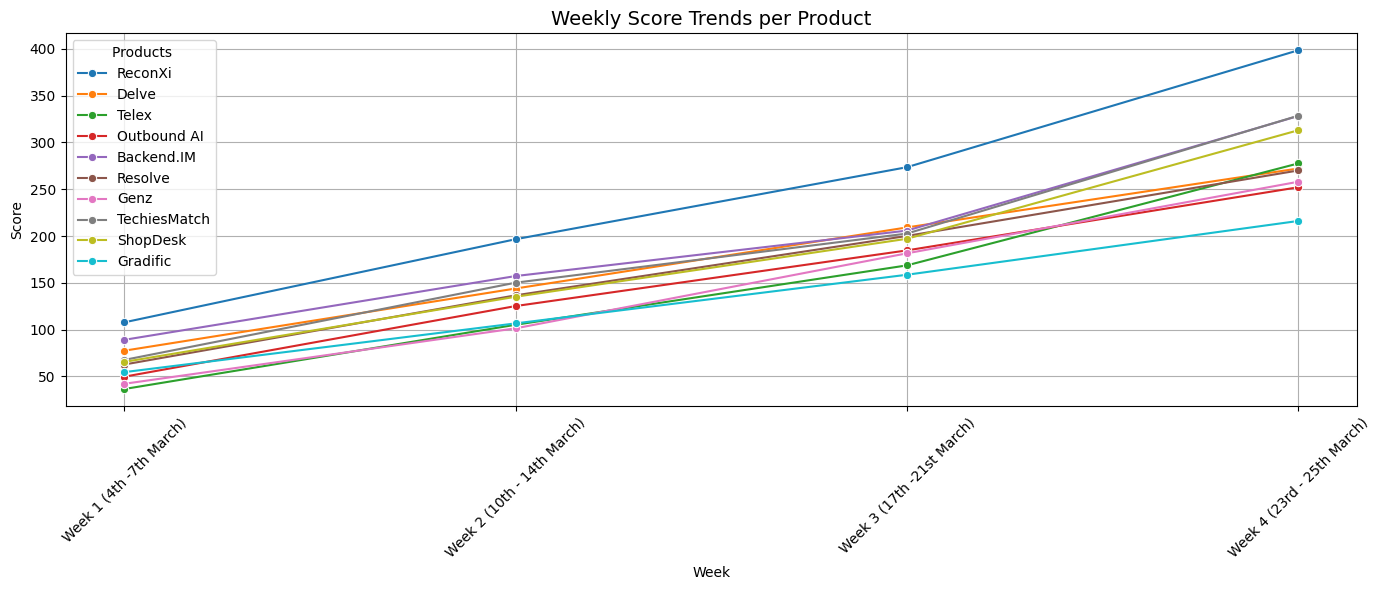

In [41]:
# Reshape for line plot
long_df = checkin_cleaned.melt(id_vars='Products ', 
                                value_vars=['Week 1 (4th -7th March)', 'Week 2 (10th - 14th March)',
                                            'Week 3 (17th -21st March)', 'Week 4 (23rd - 25th March)'],
                                var_name='Week', 
                                value_name='Score')

plt.figure(figsize=(14, 6))
sns.lineplot(data=long_df, x='Week', y='Score', hue='Products ', marker='o')
plt.title("Weekly Score Trends per Product", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
